In [271]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [245]:
# Import datasets
teams = pd.read_csv("Teams.csv")
salaries = pd.read_csv("Salaries.csv")

In [246]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          3015 non-null   int64  
 1   lgID            2965 non-null   object 
 2   teamID          3015 non-null   object 
 3   franchID        3015 non-null   object 
 4   divID           1498 non-null   object 
 5   Rank            3015 non-null   int64  
 6   G               3015 non-null   int64  
 7   Ghome           2616 non-null   float64
 8   W               3015 non-null   int64  
 9   L               3015 non-null   int64  
 10  DivWin          1470 non-null   object 
 11  WCWin           834 non-null    object 
 12  LgWin           2987 non-null   object 
 13  WSWin           2658 non-null   object 
 14  R               3015 non-null   int64  
 15  AB              3015 non-null   int64  
 16  H               3015 non-null   int64  
 17  2B              3015 non-null   i

In [247]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yearID    26428 non-null  int64 
 1   teamID    26428 non-null  object
 2   lgID      26428 non-null  object
 3   playerID  26428 non-null  object
 4   salary    26428 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [248]:
# Clean datasets
teams = teams.dropna()
salaries = salaries.dropna()

In [249]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 2181 to 3014
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          834 non-null    int64  
 1   lgID            834 non-null    object 
 2   teamID          834 non-null    object 
 3   franchID        834 non-null    object 
 4   divID           834 non-null    object 
 5   Rank            834 non-null    int64  
 6   G               834 non-null    int64  
 7   Ghome           834 non-null    float64
 8   W               834 non-null    int64  
 9   L               834 non-null    int64  
 10  DivWin          834 non-null    object 
 11  WCWin           834 non-null    object 
 12  LgWin           834 non-null    object 
 13  WSWin           834 non-null    object 
 14  R               834 non-null    int64  
 15  AB              834 non-null    int64  
 16  H               834 non-null    int64  
 17  2B              834 non-null   

In [250]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yearID    26428 non-null  int64 
 1   teamID    26428 non-null  object
 2   lgID      26428 non-null  object
 3   playerID  26428 non-null  object
 4   salary    26428 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [251]:
# Aggregate salaries by team
salaries = salaries.groupby(['yearID', 'teamID', 'lgID']).sum('salary').reset_index()
salaries.head()

,yearID,teamID,lgID,salary
0,1985,ATL,NL,14807000
1,1985,BAL,AL,11560712
2,1985,BOS,AL,10897560
3,1985,CAL,AL,14427894
4,1985,CHA,AL,9846178


In [252]:
# Merge datasets by teamID
teams_salaries = pd.merge(teams, salaries, on=['teamID', 'yearID', 'lgID'])

teams_salaries.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,salary
0,1995,NL,ATL,ATL,E,1,144,72.0,90,54,...,0.982,Atlanta Braves,Atlanta-Fulton County Stadium,2561831.0,103,102,ATL,ATL,ATL,47235445
1,1995,AL,BAL,BAL,E,3,144,72.0,71,73,...,0.986,Baltimore Orioles,Oriole Park at Camden Yards,3098475.0,102,101,BAL,BAL,BAL,43942521
2,1995,AL,BOS,BOS,E,1,144,72.0,86,58,...,0.978,Boston Red Sox,Fenway Park II,2164410.0,103,103,BOS,BOS,BOS,32455518
3,1995,AL,CAL,ANA,W,2,145,72.0,78,67,...,0.982,California Angels,Anaheim Stadium,1748680.0,99,99,CAL,CAL,CAL,31223171
4,1995,AL,CHA,CHW,C,3,145,72.0,68,76,...,0.980,Chicago White Sox,Comiskey Park II,1609773.0,96,95,CHW,CHA,CHA,46961282


In [253]:
# Select only necessary columns
teams_salaries = teams_salaries.loc[:, ['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'W', 'L', 'attendance', 'salary']]
teams_salaries.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,W,L,attendance,salary
0,1995,NL,ATL,ATL,E,1,144,90,54,2561831.0,47235445
1,1995,AL,BAL,BAL,E,3,144,71,73,3098475.0,43942521
2,1995,AL,BOS,BOS,E,1,144,86,58,2164410.0,32455518
3,1995,AL,CAL,ANA,W,2,145,78,67,1748680.0,31223171
4,1995,AL,CHA,CHW,C,3,145,68,76,1609773.0,46961282


In [254]:
# Drop NAs
teams_salaries = teams_salaries.dropna()

teams_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 653
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yearID      654 non-null    int64  
 1   lgID        654 non-null    object 
 2   teamID      654 non-null    object 
 3   franchID    654 non-null    object 
 4   divID       654 non-null    object 
 5   Rank        654 non-null    int64  
 6   G           654 non-null    int64  
 7   W           654 non-null    int64  
 8   L           654 non-null    int64  
 9   attendance  654 non-null    float64
 10  salary      654 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 61.3+ KB


In [255]:
teams_salaries['WinPct'] = (teams_salaries['W'] / teams_salaries['G']).round(3)

teams_salaries.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,W,L,attendance,salary,WinPct
0,1995,NL,ATL,ATL,E,1,144,90,54,2561831.0,47235445,0.625
1,1995,AL,BAL,BAL,E,3,144,71,73,3098475.0,43942521,0.493
2,1995,AL,BOS,BOS,E,1,144,86,58,2164410.0,32455518,0.597
3,1995,AL,CAL,ANA,W,2,145,78,67,1748680.0,31223171,0.538
4,1995,AL,CHA,CHW,C,3,145,68,76,1609773.0,46961282,0.469


In [256]:
def millions(x, pos):
    return '{:.1f}m'.format(x/1000000)

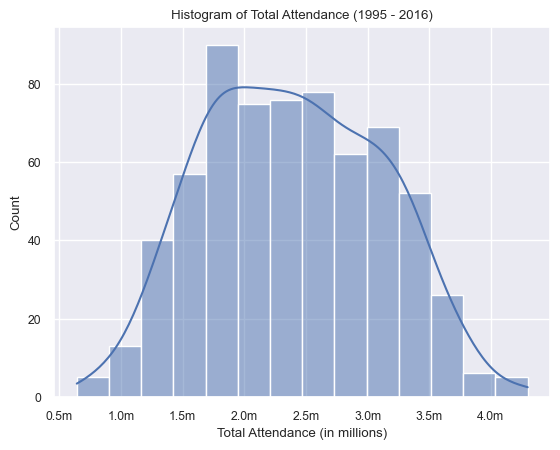

In [257]:
sns.set_style("darkgrid")
sns.set(font_scale=0.8)

sns.histplot(x='attendance', data=teams_salaries, kde=True)
plt.xlabel("Total Attendance (in millions)")
plt.title("Histogram of Total Attendance (1995 - 2016)")
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(millions))
plt.show();

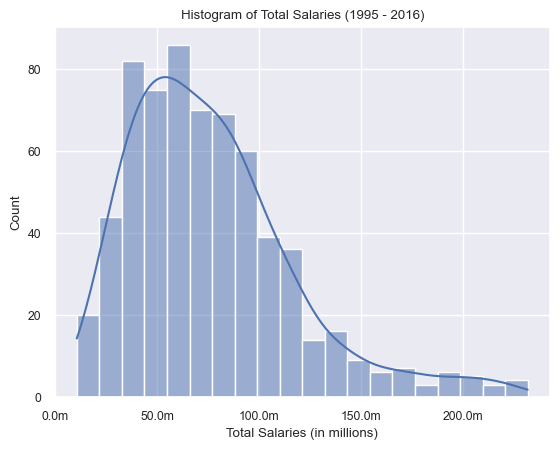

In [258]:
sns.histplot(x='salary', data=teams_salaries, kde=True)
plt.xlabel("Total Salaries (in millions)")
plt.title("Histogram of Total Salaries (1995 - 2016)")
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(millions))
plt.show();

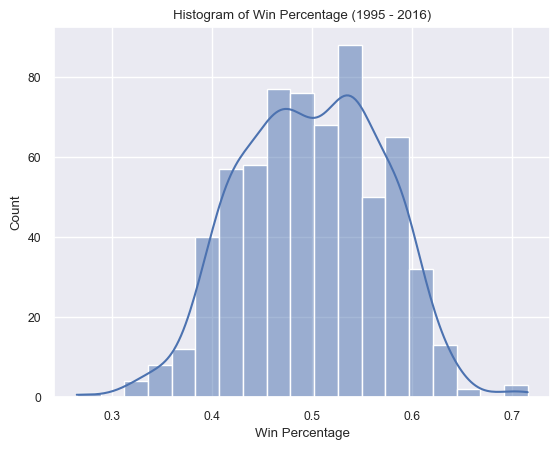

In [259]:
sns.histplot(x='WinPct', data=teams_salaries, kde=True)
plt.xlabel("Win Percentage")
plt.title("Histogram of Win Percentage (1995 - 2016)")
plt.show();

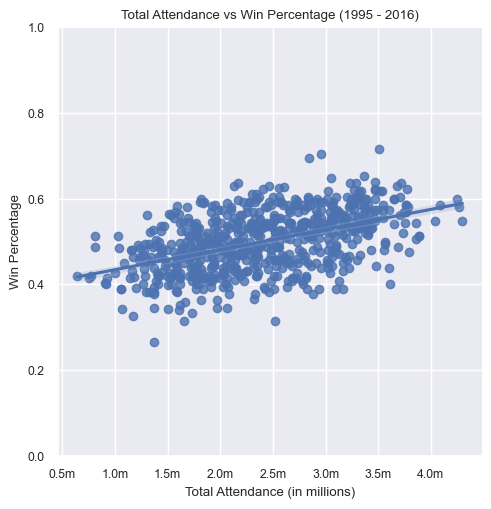

In [260]:
sns.lmplot(x='attendance', y='WinPct', data=teams_salaries)
plt.xlabel("Total Attendance (in millions)")
plt.ylabel("Win Percentage")
plt.ylim(0, 1)
plt.title("Total Attendance vs Win Percentage (1995 - 2016)")
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(millions))
plt.show();

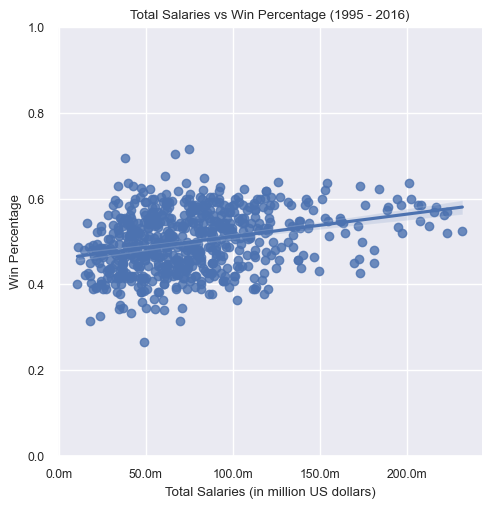

In [261]:
sns.lmplot(x='salary', y='WinPct', data=teams_salaries)
plt.xlabel("Total Salaries (in million US dollars)")
plt.ylabel("Win Percentage")
plt.ylim(0, 1)
plt.title("Total Salaries vs Win Percentage (1995 - 2016)")
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(millions))
plt.show();

In [262]:
tbrrevenue = pd.read_excel("tbrrevenue.xlsx")

tbrrevenue.head()

,yearID,revenue
0,2001,92
1,2002,91
2,2003,101
3,2004,110
4,2005,116


In [263]:
tbr = pd.merge(teams_salaries[teams_salaries['franchID']=='TBD'], tbrrevenue, on='yearID')

tbr.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,W,L,attendance,salary,WinPct,revenue
0,2001,AL,TBA,TBD,E,5,162,62,100,1298365.0,56980000,0.383,92
1,2002,AL,TBA,TBD,E,5,161,55,106,1065742.0,34380000,0.342,91
2,2003,AL,TBA,TBD,E,5,162,63,99,1058695.0,19630000,0.389,101
3,2004,AL,TBA,TBD,E,4,161,70,91,1274911.0,29556667,0.435,110
4,2005,AL,TBA,TBD,E,5,162,67,95,1141669.0,29679067,0.414,116


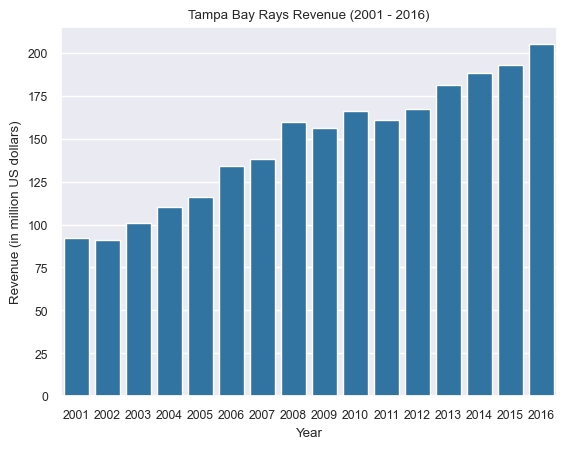

In [267]:
sns.barplot(x='yearID', y='revenue', data=tbr, color='#1f77b4')
plt.xlabel("Year")
plt.ylabel("Revenue (in million US dollars)")
plt.title("Tampa Bay Rays Revenue (2001 - 2016)")
plt.show();

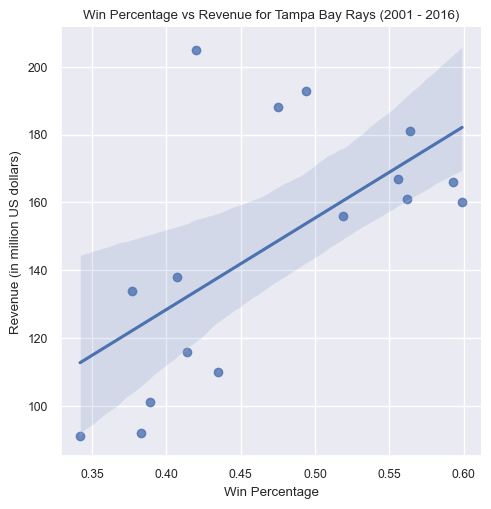

In [265]:
sns.lmplot(x='WinPct', y='revenue', data=tbr)
plt.xlabel("Win Percentage")
plt.ylabel("Revenue (in million US dollars)")
plt.title("Win Percentage vs Revenue for Tampa Bay Rays (2001 - 2016)")
plt.show();

In [278]:
model = sm.OLS(teams_salaries['attendance'], teams_salaries['WinPct'])

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             attendance   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              9679.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):                        0.00
Time:                        13:43:41   Log-Likelihood:                         -9659.2
No. Observations:                 654   AIC:                                  1.932e+04
Df Residuals:                     653   BIC:                                  1.932e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WinPct      4.791e+06   4.87e+04     98.384      0.000     4.7e+06    4.89e+06
==============================================================================
Omnibus:                       15.476   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.026
Skew:                           0.102   Prob(JB):                       0.0110
Kurtosis:                       2.462   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
model = sm.OLS(teams_salaries['salary'], teams_salaries['WinPct'])

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                              2584.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):                   3.44e-229
Time:                        13:44:20   Log-Likelihood:                         -12357.
No. Observations:                 654   AIC:                                  2.472e+04
Df Residuals:                     653   BIC:                                  2.472e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WinPct      1.531e+08   3.01e+06     50.836      0.000    1.47e+08    1.59e+08
==============================================================================
Omnibus:                      116.445   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.536
Skew:                           1.109   Prob(JB):                     1.55e-42
Kurtosis:                       4.465   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
model = sm.OLS(tbr['WinPct'], tbr['revenue'])

result = model.fit()
result.summary()

/Users/jihan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 WinPct   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              423.3
Date:                Sat, 15 Apr 2023   Prob (F-statistic):                    2.09e-12
Time:                        13:51:09   Log-Likelihood:                          16.114
No. Observations:                  16   AIC:                                     -30.23
Df Residuals:                      15   BIC:                                     -29.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
revenue        0.0031      0.000     20.575      0.000       0.003       0.003
==============================================================================
Omnibus:                        6.872   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.187
Skew:                          -1.214   Prob(JB):                        0.123
Kurtosis:                       3.621   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
pearson_corr, pearson_pval = stats.pearsonr(teams_salaries['attendance'], teams_salaries['WinPct'])
print('Pearson correlation coefficient: ', pearson_corr.round(3))
print('Pearson p-value: ', pearson_pval)

Pearson correlation coefficient:  0.48
Pearson p-value:  6.504403274693679e-39


In [288]:
pearson_corr, pearson_pval = stats.pearsonr(teams_salaries['salary'], teams_salaries['WinPct'])
print('Pearson correlation coefficient: ', pearson_corr.round(3))
print('Pearson p-value: ', pearson_pval)

Pearson correlation coefficient:  0.302
Pearson p-value:  2.927611410213665e-15


In [289]:
pearson_corr, pearson_pval = stats.pearsonr(tbr['WinPct'], tbr['revenue'])
print('Pearson correlation coefficient: ', pearson_corr.round(3))
print('Pearson p-value: ', pearson_pval)

Pearson correlation coefficient:  0.626
Pearson p-value:  0.009529767585701723
